In [6]:
# read video capture from webcam
import cv2
import pychromecast as pychromecast

cap = cv2.VideoCapture(0)

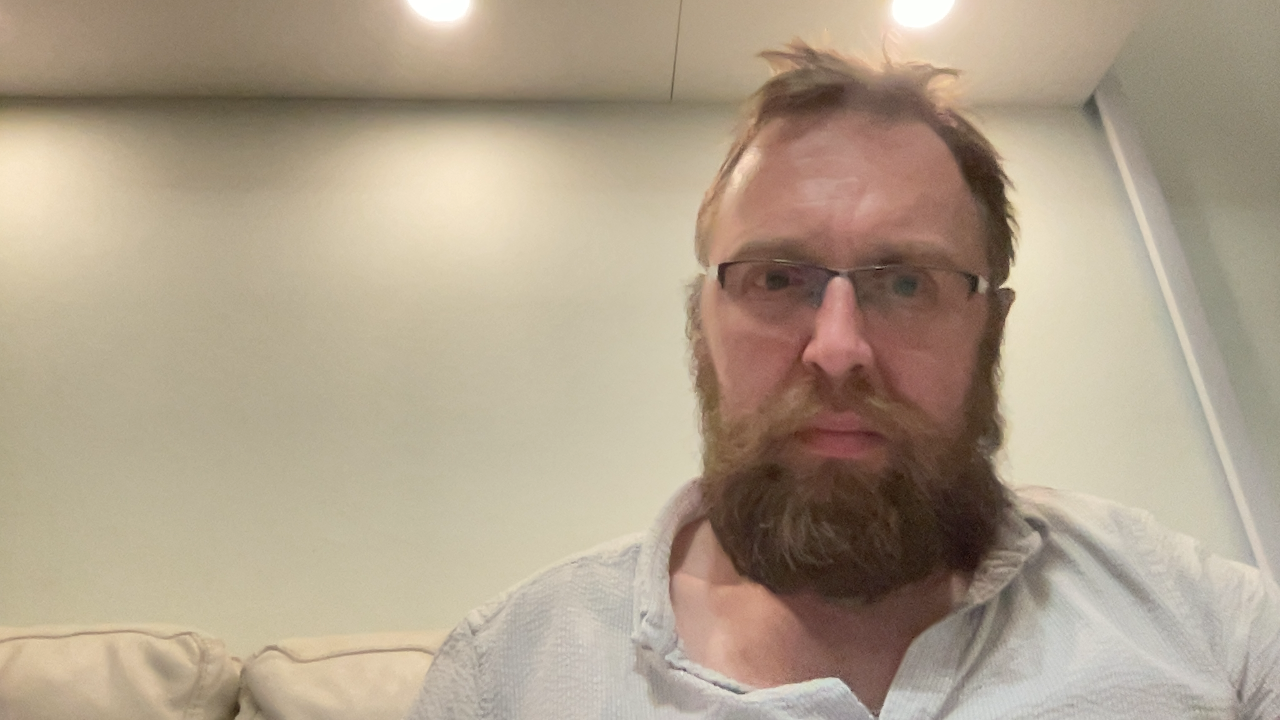

In [8]:
# display the video in in a cell
from IPython.display import clear_output
import PIL.Image

import io

try:
   
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        clear_output(wait=True)
        img = PIL.Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        img.save("test.jpg")

        display(img)
except KeyboardInterrupt:
    cap.release()

In [20]:
import cv2

# Step 1: Connect to Chromecast device
chromecasts = pychromecast.get_chromecasts()
chromecast = chromecasts[0]

print(chromecast)
print(chromecast.device)
print(chromecast.status)
chromecast.wait()

# Step 2: Get media controller
mc = chromecast.media_controller

# Step 3: Start capturing video
cap = cv2.VideoCapture(0)

# Step 4: Set video capture properties
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)

# Step 5: Create media receiver
mc.play_media('', 'image/jpeg')

# Step 6: Wait for receiver to start
mc.block_until_active()

# Step 7: Start the video loop
while True:
    ret, frame = cap.read()
    if not ret:
        break
    # Process the frame here...
    success, encoded_frame = cv2.imencode('.jpg', frame)
    if success:
        mc.update_image(encoded_frame.tobytes())
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Step 8: Release the video capture and disconnect from the Chromecast device
cap.release()
cv2.destroyAllWindows()
chromecast.disconnect()



[]


AttributeError: 'list' object has no attribute 'device'

In [22]:
chromecasts = pychromecast.get_chromecasts()
chromecasts

([], <pychromecast.discovery.CastBrowser at 0x12cc6acd0>)